In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
# pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0 --upgrade --force-reinstall

In [ ]:
!pip install pytesseract

KeyboardInterrupt: 

# **Extract Heading:**


In [ ]:
import cv2
import pytesseract

# Here, we import Heading of the news,

heading = cv2.imread("/kaggle/input/images/Screenshot 2025-06-21 203642.png")
gray = cv2.cvtColor(heading, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, 15, 10)

text = pytesseract.image_to_string(thresh, config='--oem 3 --psm 6')
print(text)

In [ ]:
# Show image using matplotlib #

image_rgb = cv2.cvtColor(heading, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt

# plt.imshow(image_rgb)
# plt.axis('off')
# plt.title("Original Image")
# plt.show()

# *Extract Body Text*

In [ ]:

img_body = cv2.imread("/kaggle/input/images/Screenshot 2025-06-22 101704.png")
gray = cv2.cvtColor(img_body, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, 15, 10)

text = pytesseract.image_to_string(thresh, config='--oem 3 --psm 6')
print(text)

# **Make A Model**

In [ ]:
# !wget https://raw.githubusercontent.com/uclnlp/fakenewschallenge/refs/heads/master/test_stances_unlabeled.csv
!wget https://raw.githubusercontent.com/uclnlp/fakenewschallenge/refs/heads/master/test_bodies.csv
!wget https://raw.githubusercontent.com/uclnlp/fakenewschallenge/refs/heads/master/train_bodies.csv
!wget https://raw.githubusercontent.com/uclnlp/fakenewschallenge/refs/heads/master/train_stances.csv
!wget https://raw.githubusercontent.com/FakeNewsChallenge/fnc-1/refs/heads/master/competition_test_stances.csv

--2025-06-23 17:45:28--  https://raw.githubusercontent.com/uclnlp/fakenewschallenge/refs/heads/master/test_bodies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2045680 (2.0M) [text/plain]
Saving to: ‘test_bodies.csv’

test_bodies.csv     100%[===================>]   1.95M  --.-KB/s    in 0.03s   

2025-06-23 17:45:29 (63.9 MB/s) - ‘test_bodies.csv’ saved [2045680/2045680]

--2025-06-23 17:45:29--  https://raw.githubusercontent.com/uclnlp/fakenewschallenge/refs/heads/master/train_bodies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

In [ ]:
import pandas as pd
train_body = pd.read_csv('/content/train_bodies.csv')
train_stance = pd.read_csv('/content/train_stances.csv')
test_body = pd.read_csv('/content/test_bodies.csv')
# test_headline = pd.read_csv('/kaggle/working/test_stances_unlabeled.csv')
test_stance = pd.read_csv('/content/competition_test_stances.csv')

In [ ]:
train_body

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...
...,...,...
1678,2528,Intelligence agencies hunting for identity of ...
1679,2529,"While Daleks ""know no fear"" and ""must not fear..."
1680,2530,More than 200 schoolgirls were kidnapped in Ap...
1681,2531,A Guantanamo Bay prisoner released last year a...


In [ ]:
train_stance.shape

(49972, 3)

In [ ]:
train_stance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  49972 non-null  object
 1   Body ID   49972 non-null  int64 
 2   Stance    49972 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
train_stance.duplicated().sum()

np.int64(402)

In [ ]:
train_stance['Body ID'].nunique()

1683

In [ ]:
train_stance[train_stance['Body ID'] == 0]['Headline']

,Headline
2460,"Soldier shot, Parliament locked down after gun..."
2488,Tourist dubbed ‘Spider Man’ after spider burro...
2682,Luke Somers 'killed in failed rescue attempt i...
4270,BREAKING: Soldier shot at War Memorial in Ottawa
4740,Giant 8ft 9in catfish weighing 19 stone caught...
7110,Enormous 20-stone catfish caught with fishing ...
7355,Italian catches huge wels catfish; is it a rec...
7857,Not coming to a store near you: The pumpkin sp...
10382,One gunman killed in shooting on Parliament Hi...
12573,Soldier shot at war memorial in Canada


In [ ]:
train_body

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...
...,...,...
1678,2528,Intelligence agencies hunting for identity of ...
1679,2529,"While Daleks ""know no fear"" and ""must not fear..."
1680,2530,More than 200 schoolgirls were kidnapped in Ap...
1681,2531,A Guantanamo Bay prisoner released last year a...


In [ ]:
train_body['Body ID'].nunique()

1683

In [ ]:
train_stance

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree
...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated
49968,Brian Williams slams social media for speculat...,2419,unrelated
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss


In [ ]:
train_body['Body ID'].count()

np.int64(1683)

In [ ]:
# Merge on "Body ID"
merged_df = pd.merge(train_stance, train_body, on="Body ID")

# Reorder columns if needed
merged_df = merged_df[["Body ID", "Headline", "articleBody", "Stance"]]


In [ ]:
merged_df

,Body ID,Headline,articleBody,Stance
0,712,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\n\n...,unrelated
1,158,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree
2,137,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated
3,1034,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated
4,1923,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree
...,...,...,...,...
49967,1681,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,(CNN) -- Boko Haram laughed off Nigeria's anno...,unrelated
49968,2419,Brian Williams slams social media for speculat...,Along with unveiling the Apple Watch earlier t...,unrelated
49969,1156,Mexico Says Missing Students Not Found In Firs...,The bodies found in a mass grave were confirme...,agree
49970,1012,US Lawmaker: Ten ISIS Fighters Have Been Appre...,Rep. Duncan Hunter (R-CA) told Greta Van Suste...,discuss


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Body ID      49972 non-null  int64 
 1   Headline     49972 non-null  object
 2   articleBody  49972 non-null  object
 3   Stance       49972 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
train_df = merged_df.drop(['Body ID'], axis = 1)

In [ ]:
train_df

,Headline,articleBody,Stance
0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\n\n...,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree
2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated
4,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree
...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,(CNN) -- Boko Haram laughed off Nigeria's anno...,unrelated
49968,Brian Williams slams social media for speculat...,Along with unveiling the Apple Watch earlier t...,unrelated
49969,Mexico Says Missing Students Not Found In Firs...,The bodies found in a mass grave were confirme...,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,Rep. Duncan Hunter (R-CA) told Greta Van Suste...,discuss


In [ ]:
#  merge training data
test_merged = pd.merge(test_body, test_stance, on = 'Body ID')

In [ ]:
test_merged

,Body ID,articleBody,Headline,Stance
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,unrelated
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,agree
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,unrelated
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,unrelated
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,unrelated
...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,disagree
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,agree
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,disagree
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,disagree


In [ ]:
test_df = test_merged.drop('Body ID', axis = 1)
test_df.shape

(25413, 3)

In [ ]:
duplicates = test_df[test_df.duplicated()]
print(duplicates)

                                             articleBody  \
483    SAN FRANCISCO -- Apple plans to shut down stre...   
821    An unfortunate woman in South Korea was left i...   
1090   A TEENAGER woke up during brain surgery — to a...   
1096   A TEENAGER woke up during brain surgery — to a...   
1103   A TEENAGER woke up during brain surgery — to a...   
...                                                  ...   
24773  Tesla Motors appears to have chosen Nevada as ...   
24834  White House Chief of Staff Denis McDonough den...   
24867  White House Chief of Staff Denis McDonough den...   
24994  A man who allegedly made a habit of stealing w...   
25002  A man who allegedly made a habit of stealing w...   

                                                Headline     Stance  
483       Wife chops off cheating husband’s penis, twice  unrelated  
821    Charles Manson’s fiancee allegedly wanted to m...  unrelated  
1090   Disturbed aunt cuts off nephew’s penis after h...  unrelated  

In [ ]:
train_df[train_df.duplicated()].count()

,0
Headline,434
articleBody,434
Stance,434


In [ ]:
train_df.shape

(49972, 3)

In [ ]:
# drop duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [ ]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

print(train_df.shape)
print(test_df.shape)

0
0
(49538, 3)
(25148, 3)


In [ ]:
train_df['Stance'].value_counts()

,count
Stance,
unrelated,36262
discuss,8804
agree,3643
disagree,829


In [ ]:
train_df

,Headline,articleBody,Stance
0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\n\n...,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree
2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated
4,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree
...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,(CNN) -- Boko Haram laughed off Nigeria's anno...,unrelated
49968,Brian Williams slams social media for speculat...,Along with unveiling the Apple Watch earlier t...,unrelated
49969,Mexico Says Missing Students Not Found In Firs...,The bodies found in a mass grave were confirme...,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,Rep. Duncan Hunter (R-CA) told Greta Van Suste...,discuss


In [ ]:
test_df

,articleBody,Headline,Stance
0,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,unrelated
1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,agree
2,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,unrelated
3,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,unrelated
4,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,unrelated
...,...,...,...
25408,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,disagree
25409,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,agree
25410,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,disagree
25411,Remember how much Republicans wanted to repeal...,Why Obamacare failed,disagree


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['clean_headline'] = train_df['Headline'].apply(clean_text)
train_df['clean_body'] = train_df['articleBody'].apply(clean_text)

/tmp/ipython-input-29-555285295.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['clean_headline'] = train_df['Headline'].apply(clean_text)
/tmp/ipython-input-29-555285295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['clean_body'] = train_df['articleBody'].apply(clean_text)


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()
    return text

test_df['clean_headline'] = test_df['Headline'].apply(clean_text)
test_df['clean_body'] = test_df['articleBody'].apply(clean_text)

In [ ]:
train_df

,Headline,articleBody,Stance,clean_headline,clean_body
0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled film\n\n...,unrelated,police find mass graves with at least 15 bodie...,danny boyle is directing the untitled film set...
1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree,hundreds of palestinians flee floods in gaza a...,hundreds of palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated,christian bale passes on role of steve jobs ac...,30 year old moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated,hbo and apple in talks for 15 month apple tv s...,reuters a canadian soldier was shot at the can...
4,Spider burrowed through tourist's stomach and ...,"Fear not arachnophobes, the story of Bunbury's...",disagree,spider burrowed through tourist s stomach and ...,fear not arachnophobes the story of bunbury s ...
...,...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,(CNN) -- Boko Haram laughed off Nigeria's anno...,unrelated,urgent the leader of isil abu bakr al baghdadi...,cnn boko haram laughed off nigeria s announcem...
49968,Brian Williams slams social media for speculat...,Along with unveiling the Apple Watch earlier t...,unrelated,brian williams slams social media for speculat...,along with unveiling the apple watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,The bodies found in a mass grave were confirme...,agree,mexico says missing students not found in firs...,the bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,Rep. Duncan Hunter (R-CA) told Greta Van Suste...,discuss,us lawmaker ten isis fighters have been appreh...,rep duncan hunter r ca told greta van susteren...


In [ ]:
test_df

,articleBody,Headline,Stance,clean_headline,clean_body
0,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,unrelated,apple installing safes in store to protect gol...,al sisi has denied israeli reports stating tha...
1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,agree,el sisi denies claims he ll give sinai land to...,al sisi has denied israeli reports stating tha...
2,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,unrelated,apple to keep gold watch editions in special i...,al sisi has denied israeli reports stating tha...
3,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,unrelated,apple stores to keep gold edition apple watch ...,al sisi has denied israeli reports stating tha...
4,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,unrelated,south korean woman s hair eaten by robot vacuu...,al sisi has denied israeli reports stating tha...
...,...,...,...,...,...
25408,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,disagree,a sign that obamacare exchanges are failing,remember how much republicans wanted to repeal...
25409,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,agree,republicans call obamacare a failure these 7 c...,remember how much republicans wanted to repeal...
25410,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,disagree,cbo s alternate facts show obamacare is unsust...,remember how much republicans wanted to repeal...
25411,Remember how much Republicans wanted to repeal...,Why Obamacare failed,disagree,why obamacare failed,remember how much republicans wanted to repeal...


In [ ]:
train_df = train_df.drop(['Headline', 'articleBody'], axis = 1)

In [ ]:
test_df = test_df.drop(['articleBody', 'Headline'], axis = 1)

In [ ]:
train_df

,Stance,clean_headline,clean_body
0,unrelated,police find mass graves with at least 15 bodie...,danny boyle is directing the untitled film set...
1,agree,hundreds of palestinians flee floods in gaza a...,hundreds of palestinians were evacuated from t...
2,unrelated,christian bale passes on role of steve jobs ac...,30 year old moscow resident was hospitalized w...
3,unrelated,hbo and apple in talks for 15 month apple tv s...,reuters a canadian soldier was shot at the can...
4,disagree,spider burrowed through tourist s stomach and ...,fear not arachnophobes the story of bunbury s ...
...,...,...,...
49967,unrelated,urgent the leader of isil abu bakr al baghdadi...,cnn boko haram laughed off nigeria s announcem...
49968,unrelated,brian williams slams social media for speculat...,along with unveiling the apple watch earlier t...
49969,agree,mexico says missing students not found in firs...,the bodies found in a mass grave were confirme...
49970,discuss,us lawmaker ten isis fighters have been appreh...,rep duncan hunter r ca told greta van susteren...


In [ ]:
test_df

,Stance,clean_headline,clean_body
0,unrelated,apple installing safes in store to protect gol...,al sisi has denied israeli reports stating tha...
1,agree,el sisi denies claims he ll give sinai land to...,al sisi has denied israeli reports stating tha...
2,unrelated,apple to keep gold watch editions in special i...,al sisi has denied israeli reports stating tha...
3,unrelated,apple stores to keep gold edition apple watch ...,al sisi has denied israeli reports stating tha...
4,unrelated,south korean woman s hair eaten by robot vacuu...,al sisi has denied israeli reports stating tha...
...,...,...,...
25408,disagree,a sign that obamacare exchanges are failing,remember how much republicans wanted to repeal...
25409,agree,republicans call obamacare a failure these 7 c...,remember how much republicans wanted to repeal...
25410,disagree,cbo s alternate facts show obamacare is unsust...,remember how much republicans wanted to repeal...
25411,disagree,why obamacare failed,remember how much republicans wanted to repeal...


In [ ]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text_no_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply to headline and body
train_df['clean_headline'] = train_df['clean_headline'].apply(clean_text_no_stopwords)
train_df['clean_body'] = train_df['clean_body'].apply(clean_text_no_stopwords)

# # do same on test data set
test_df['clean_headline'] = test_df['clean_headline'].apply(clean_text_no_stopwords)
test_df['clean_body'] = test_df['clean_body'].apply(clean_text_no_stopwords)


In [ ]:
train_df

,Stance,clean_headline,clean_body
0,unrelated,police find mass graves least 15 bodies near m...,danny boyle directing untitled film seth rogen...
1,agree,hundreds palestinians flee floods gaza israel ...,hundreds palestinians evacuated homes sunday m...
2,unrelated,christian bale passes role steve jobs actor re...,30 year old moscow resident hospitalized wound...
3,unrelated,hbo apple talks 15 month apple tv streaming se...,reuters canadian soldier shot canadian war mem...
4,disagree,spider burrowed tourist stomach chest,fear arachnophobes story bunbury spiderman mig...
...,...,...,...
49967,unrelated,urgent leader isil abu bakr al baghdadi killed...,cnn boko haram laughed nigeria announcement ce...
49968,unrelated,brian williams slams social media speculation ...,along unveiling apple watch earlier year compa...
49969,agree,mexico says missing students found first mass ...,bodies found mass grave confirmed missing stud...
49970,discuss,us lawmaker ten isis fighters apprehended comi...,rep duncan hunter r ca told greta van susteren...


In [ ]:
test_df

,Stance,clean_headline,clean_body
0,unrelated,apple installing safes store protect gold watc...,al sisi denied israeli reports stating offered...
1,agree,el sisi denies claims give sinai land palestin...,al sisi denied israeli reports stating offered...
2,unrelated,apple keep gold watch editions special store s...,al sisi denied israeli reports stating offered...
3,unrelated,apple stores keep gold edition apple watch cus...,al sisi denied israeli reports stating offered...
4,unrelated,south korean woman hair eaten robot vacuum cle...,al sisi denied israeli reports stating offered...
...,...,...,...
25408,disagree,sign obamacare exchanges failing,remember much republicans wanted repeal obamac...
25409,agree,republicans call obamacare failure 7 charts sh...,remember much republicans wanted repeal obamac...
25410,disagree,cbo alternate facts show obamacare unsustainable,remember much republicans wanted repeal obamac...
25411,disagree,obamacare failed,remember much republicans wanted repeal obamac...


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['Stance'])

# 0 = agree, 1 = disagree, 2 = discuss, 3 = unrelated (order may vary)
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'agree': np.int64(0), 'disagree': np.int64(1), 'discuss': np.int64(2), 'unrelated': np.int64(3)}


In [ ]:
train_df = train_df.drop(['Stance'], axis = 1)

In [ ]:
train_df

,clean_headline,clean_body,label
0,police find mass graves least 15 bodies near m...,danny boyle directing untitled film seth rogen...,3
1,hundreds palestinians flee floods gaza israel ...,hundreds palestinians evacuated homes sunday m...,0
2,christian bale passes role steve jobs actor re...,30 year old moscow resident hospitalized wound...,3
3,hbo apple talks 15 month apple tv streaming se...,reuters canadian soldier shot canadian war mem...,3
4,spider burrowed tourist stomach chest,fear arachnophobes story bunbury spiderman mig...,1
...,...,...,...
49967,urgent leader isil abu bakr al baghdadi killed...,cnn boko haram laughed nigeria announcement ce...,3
49968,brian williams slams social media speculation ...,along unveiling apple watch earlier year compa...,3
49969,mexico says missing students found first mass ...,bodies found mass grave confirmed missing stud...,0
49970,us lawmaker ten isis fighters apprehended comi...,rep duncan hunter r ca told greta van susteren...,2


In [ ]:
test_df['label'] = le.transform(test_df['Stance'])

# 0 = agree, 1 = disagree, 2 = discuss, 3 = unrelated (order may vary)
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'agree': np.int64(0), 'disagree': np.int64(1), 'discuss': np.int64(2), 'unrelated': np.int64(3)}


In [ ]:
test_df = test_df.drop(['Stance'], axis = 1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all texts to build global vocabulary
all_texts = pd.concat([train_df['clean_headline'], train_df['clean_body']])

# Build vectorizer with limited vocab (optional, e.g., top 5000 words)
vectorizer = TfidfVectorizer(max_features = 5000)
vectorizer.fit(all_texts)

# Now transform headline and body separately
train_headline_tfidf = vectorizer.transform(train_df['clean_headline'])
train_body_tfidf = vectorizer.transform(train_df['clean_body'])


In [ ]:
train_headline_tfidf.shape
# the shape is (# of row, vocabulary size)
# this contain a TF vector for each heading.
# similarly for the body text

(49538, 5000)

In [ ]:
train_body_tfidf.shape

(49538, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate cosine similarity between each row’s headline and body vector
cos_sim = []
for i in range(len(train_df)):
    sim = cosine_similarity(train_headline_tfidf[i], train_body_tfidf[i])[0][0]
    cos_sim.append(sim)

# Add to dataframe
train_df['cosine_sim'] = cos_sim

**Cosine similarity is also calculated for each headline and the body text, by combining both headline TF_IDF vector and body tfidf vector and its cosine similarity, that is the input to the neural network or other model,**

In [ ]:
train_df

,clean_headline,clean_body,label,cosine_sim
0,police find mass graves least 15 bodies near m...,danny boyle directing untitled film seth rogen...,3,0.000000
1,hundreds palestinians flee floods gaza israel ...,hundreds palestinians evacuated homes sunday m...,0,0.575876
2,christian bale passes role steve jobs actor re...,30 year old moscow resident hospitalized wound...,3,0.000000
3,hbo apple talks 15 month apple tv streaming se...,reuters canadian soldier shot canadian war mem...,3,0.000000
4,spider burrowed tourist stomach chest,fear arachnophobes story bunbury spiderman mig...,1,0.205248
...,...,...,...,...
49967,urgent leader isil abu bakr al baghdadi killed...,cnn boko haram laughed nigeria announcement ce...,3,0.020499
49968,brian williams slams social media speculation ...,along unveiling apple watch earlier year compa...,3,0.000000
49969,mexico says missing students found first mass ...,bodies found mass grave confirmed missing stud...,0,0.499086
49970,us lawmaker ten isis fighters apprehended comi...,rep duncan hunter r ca told greta van susteren...,2,0.496540


In [ ]:
# TEST DATA SAME THING IMPLIMENT
# Combine all texts to build global vocabulary
all_texts = pd.concat([test_df['clean_headline'], test_df['clean_body']])

vectorizer.transform(all_texts)

# Now transform headline and body separately
test_headline_tfidf = vectorizer.transform(test_df['clean_headline'])
test_body_tfidf = vectorizer.transform(test_df['clean_body'])


In [ ]:
# Calculate cosine similarity between each row’s headline and body vector
cos_sim = []
for i in range(len(test_df)):
    sim = cosine_similarity(test_headline_tfidf[i], test_body_tfidf[i])[0][0]
    cos_sim.append(sim)

# Add to dataframe
test_df['cosine_sim'] = cos_sim

In [ ]:
test_df

,clean_headline,clean_body,label,cosine_sim
0,apple installing safes store protect gold watc...,al sisi denied israeli reports stating offered...,3,0.000000
1,el sisi denies claims give sinai land palestin...,al sisi denied israeli reports stating offered...,0,0.000000
2,apple keep gold watch editions special store s...,al sisi denied israeli reports stating offered...,3,0.000000
3,apple stores keep gold edition apple watch cus...,al sisi denied israeli reports stating offered...,3,0.000000
4,south korean woman hair eaten robot vacuum cle...,al sisi denied israeli reports stating offered...,3,0.000000
...,...,...,...,...
25408,sign obamacare exchanges failing,remember much republicans wanted repeal obamac...,1,0.039532
25409,republicans call obamacare failure 7 charts sh...,remember much republicans wanted repeal obamac...,0,0.012083
25410,cbo alternate facts show obamacare unsustainable,remember much republicans wanted repeal obamac...,1,0.087482
25411,obamacare failed,remember much republicans wanted repeal obamac...,1,0.000000


In [ ]:
# See the headline_tfidf
# For small sample (first 3 headlines)
dense_sample = test_headline_tfidf[:1].todense()
# print(dense_sample)
# this contain 5000 vocabulary
temp = pd.DataFrame(dense_sample)
temp.nunique()

,0
0,1
1,1
2,1
3,1
4,1
...,...
4995,1
4996,1
4997,1
4998,1


In [ ]:
# Get vocabulary mapping: word → index
vocab = vectorizer.vocabulary_

# Invert to get index → word
index_to_word = {i: w for w, i in vocab.items()}

# Print first row with word names and TF-IDF values
row = test_headline_tfidf[0].toarray()[0]

for i, score in enumerate(row):
    if score > 0:
        print(f"{index_to_word[i]}: {score:.4f}")


# change if condition to see entire vocablury

apple: 0.3223
edition: 0.4554
gold: 0.4470
protect: 0.4739
store: 0.4103
watch: 0.3099


In [ ]:
# Merge and make input data for model
from scipy.sparse import hstack

# Combine TF-IDF vectors side by side
train_combined_tfidf = hstack([train_headline_tfidf, train_body_tfidf])

In [ ]:
train_combined_tfidf.shape

(49538, 10000)

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

cos_sim_array = np.array(train_df['cosine_sim']).reshape(-1, 1)
cos_sim_sparse = csr_matrix(cos_sim_array)

# Add to the right side of the combined features
train_final_features = hstack([train_combined_tfidf, cos_sim_sparse])


In [ ]:
train_final_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6590991 stored elements and shape (49538, 10001)>

In [ ]:
# For test model

# Combine TF-IDF vectors side by side
test_combined_tfidf = hstack([test_headline_tfidf, test_body_tfidf])


test_cos_sim_array = np.array(test_df['cosine_sim']).reshape(-1, 1)
test_cos_sim_sparse = csr_matrix(test_cos_sim_array)

# Add to the right side of the combined features
test_final_features = hstack([test_combined_tfidf, test_cos_sim_sparse])


In [ ]:
test_final_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2768764 stored elements and shape (25148, 10001)>

# Entire data is Ready:

In [ ]:
X_train = train_final_features
X_test = test_final_features
y_train = train_df['label']
y_test = test_df['label']

In [ ]:
y_train

,label
0,3
1,0
2,3
3,3
4,1
...,...
49967,3
49968,3
49969,0
49970,2


In [ ]:
y_test

,label
0,3
1,0
2,3
3,3
4,3
...,...
25408,1
25409,0
25410,1
25411,1


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, class_weight = 'balanced')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2768764 stored elements and shape (25148, 10001)>

In [ ]:
y_test

,label
0,3
1,0
2,3
3,3
4,3
...,...
25408,1
25409,0
25410,1
25411,1


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51      1873
           1       0.38      0.02      0.03       696
           2       0.74      0.65      0.69      4397
           3       0.93      0.98      0.95     18182

    accuracy                           0.86     25148
   macro avg       0.63      0.55      0.55     25148
weighted avg       0.85      0.86      0.85     25148



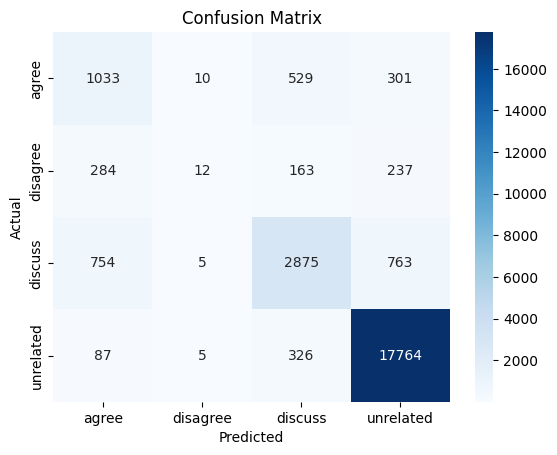

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get number of classes
num_classes = len(le.classes_)
label_names = le.classes_

cm = confusion_matrix(y_test, y_pred, labels=range(num_classes))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
train_stance['Stance'].value_counts()

,count
Stance,
unrelated,36545
discuss,8909
agree,3678
disagree,840


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# X and y should already be your feature vectors and encoded labels
# X_train, X_test, y_train, y_test = train_test_split(final_features, y_encoded, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(class_weight = 'balanced', max_iter = 1000))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1873
           1       0.30      0.01      0.03       696
           2       0.73      0.66      0.69      4397
           3       0.93      0.98      0.95     18182

    accuracy                           0.86     25148
   macro avg       0.61      0.54      0.55     25148
weighted avg       0.84      0.86      0.85     25148



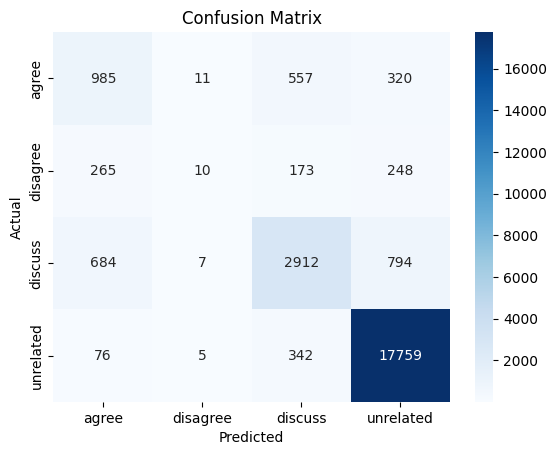

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get number of classes
num_classes = len(le.classes_)
label_names = le.classes_

cm = confusion_matrix(y_test, y_pred, labels=range(num_classes))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X and y should already be your feature vectors and encoded labels
# X_train, X_test, y_train, y_test = train_test_split(final_features, y_encoded, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.57      0.49      1873
           1       0.00      0.00      0.00       696
           2       0.50      0.72      0.59      4397
           3       0.96      0.86      0.91     18182

    accuracy                           0.79     25148
   macro avg       0.47      0.54      0.50     25148
weighted avg       0.81      0.79      0.79     25148



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier


In [ ]:
bbc = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(class_weight='balanced', max_leaf_nodes = 20),  # base learner
    sampling_strategy='auto',            # resample to match minority class
    n_estimators = 200,                     # number of bagging iterations
    replacement=False,                   # no replacement during sampling
    random_state=42,
    n_jobs = -1
)


In [ ]:
#  TRAIN the model    -------------> with 20 model (n_estimators)
# bbc.fit(X_train, y_train)

# # Now PREDICT
# y_pred = bbc.predict(X_test)

# # Evaluate performance
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.73      0.43      1873
           1       0.26      0.17      0.20       696
           2       0.41      0.30      0.35      4397
           3       0.94      0.88      0.91     18182

    accuracy                           0.75     25148
   macro avg       0.48      0.52      0.47     25148
weighted avg       0.78      0.75      0.75     25148



In [ ]:
bbc.fit(X_train, y_train)

# Now PREDICT
y_pred = bbc.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.73      0.44      1873
           1       0.26      0.16      0.20       696
           2       0.42      0.31      0.35      4397
           3       0.94      0.88      0.91     18182

    accuracy                           0.75     25148
   macro avg       0.48      0.52      0.47     25148
weighted avg       0.78      0.75      0.76     25148



In [ ]:
bbc = BalancedBaggingClassifier(
    estimator = LogisticRegression(),
    sampling_strategy='auto',            # resample to match minority class
    n_estimators = 20,                     # number of bagging iterations
    replacement=False,                   # no replacement during sampling
    random_state=42,
    n_jobs = -1
)

In [ ]:
bbc.fit(X_train, y_train)

# Now PREDICT
y_pred = bbc.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.66      0.52      1873
           1       0.29      0.05      0.08       696
           2       0.82      0.48      0.61      4397
           3       0.91      0.98      0.95     18182

    accuracy                           0.85     25148
   macro avg       0.61      0.54      0.54     25148
weighted avg       0.84      0.85      0.83     25148



In [ ]:
bbc = BalancedBaggingClassifier(
    estimator = LogisticRegression(),
    sampling_strategy='all',            # resample to match minority class
    n_estimators = 100,                     # number of bagging iterations
    replacement=False,                   # no replacement during sampling
    random_state=42,
    n_jobs = -1
)

In [ ]:
bbc.fit(X_train, y_train)

# Now PREDICT
y_pred = bbc.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.65      0.52      1873
           1       0.33      0.05      0.09       696
           2       0.81      0.48      0.61      4397
           3       0.91      0.98      0.95     18182

    accuracy                           0.85     25148
   macro avg       0.62      0.54      0.54     25148
weighted avg       0.84      0.85      0.83     25148



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Define the base estimator
base_model = LogisticRegression(n_jobs=-1)

# Create the BalancedBaggingClassifier (placeholder — base for GridSearchCV)
bbc = BalancedBaggingClassifier(estimator=base_model, random_state=42, n_jobs=-1)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 96, 128],                          # For the ensemble
    'sampling_strategy': ['all', 'not minority'],     # Sampling strategies
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=bbc, param_grid=param_grid,
                           scoring='f1_macro', cv=cv, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best estimator and score
print("Best Params:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'n_estimators': 128, 'sampling_strategy': 'all'}
Best F1 Macro Score: 0.7330389554898412
              precision    recall  f1-score   support

           0       0.43      0.65      0.52      1873
           1       0.33      0.05      0.09       696
           2       0.82      0.48      0.61      4397
           3       0.91      0.98      0.95     18182

    accuracy                           0.85     25148
   macro avg       0.62      0.54      0.54     25148
weighted avg       0.84      0.85      0.83     25148



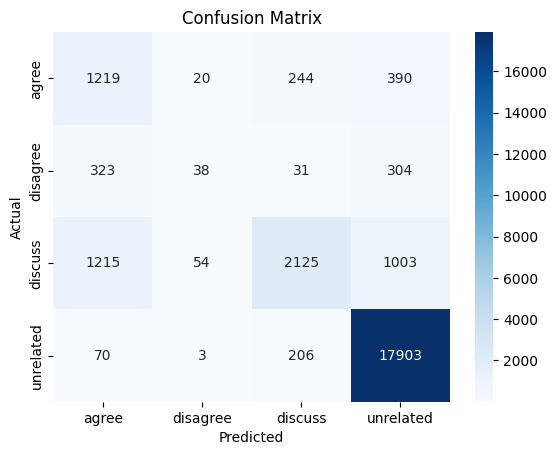

In [ ]:
# Get number of classes
num_classes = len(le.classes_)
label_names = le.classes_

cm = confusion_matrix(y_test, y_pred, labels=range(num_classes))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

(49538, 5000)


In [ ]:
import numpy as np

X_head_train = train_headline_tfidf.toarray()
X_body_train = train_body_tfidf.toarray()
X_cos_train = train_df['cosine_sim']



In [ ]:
print(X_head_train.shape)
print(X_body_train.shape)
print(X_head_train.shape)

(49538, 5000)
(49538, 5000)
(49538, 5000)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

vocab_size = X_head.shape[1]  # e.g. 5000

# Input layers
inp_head = layers.Input(shape=(vocab_size,), name='headline_input')
inp_body = layers.Input(shape=(vocab_size,), name='body_input')
inp_cos = layers.Input(shape=(1,), name='cosine_input')

# Concatenate TF-IDF representations
merged = layers.Concatenate()([inp_head, inp_body, inp_cos])

# Hidden layer
x = layers.Dense(100, activation='relu')(merged)
x = layers.Dropout(0.5)(x)  # prevent overfitting

# Output layer
out = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=[inp_head, inp_body, inp_cos], outputs=out)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ headline_input      │ (None, 5000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_input          │ (None, 5000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cosine_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 10001)     │          0 │ headline_input[0… │
│ (Concatenate)       │                   │            │ body_input[0][0], │
│                     │                   │            │ cosine_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 100)       │  1,000,200 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 100)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │        404 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,000,604 (3.82 MB)

 Trainable params: 1,000,604 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw = dict(enumerate(class_weights))

history = model.fit(
    [X_head, X_body, X_cos],
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    class_weight=cw,
    verbose=2
)

Epoch 1/10
349/349 - 11s - 31ms/step - accuracy: 0.7117 - loss: 0.9563 - val_accuracy: 0.8476 - val_loss: 0.5128
Epoch 2/10
349/349 - 9s - 25ms/step - accuracy: 0.8822 - loss: 0.5024 - val_accuracy: 0.9314 - val_loss: 0.2492
Epoch 3/10
349/349 - 8s - 23ms/step - accuracy: 0.9266 - loss: 0.3504 - val_accuracy: 0.9475 - val_loss: 0.1825
Epoch 4/10
349/349 - 9s - 25ms/step - accuracy: 0.9456 - loss: 0.2826 - val_accuracy: 0.9588 - val_loss: 0.1391
Epoch 5/10
349/349 - 9s - 25ms/step - accuracy: 0.9561 - loss: 0.2295 - val_accuracy: 0.9621 - val_loss: 0.1225
Epoch 6/10
349/349 - 10s - 29ms/step - accuracy: 0.9641 - loss: 0.1977 - val_accuracy: 0.9681 - val_loss: 0.1043
Epoch 7/10
349/349 - 8s - 23ms/step - accuracy: 0.9691 - loss: 0.1661 - val_accuracy: 0.9725 - val_loss: 0.0872
Epoch 8/10
349/349 - 11s - 31ms/step - accuracy: 0.9734 - loss: 0.1473 - val_accuracy: 0.9736 - val_loss: 0.0859
Epoch 9/10
349/349 - 9s - 25ms/step - accuracy: 0.9751 - loss: 0.1301 - val_accuracy: 0.9736 - val_lo

In [ ]:
X_head_test = test_headline_tfidf.toarray()
X_body_test = test_body_tfidf.toarray()
X_cos_test = test_df['cosine_sim']

In [ ]:
y_pred_probs = model.predict([X_head_test, X_body_test, X_cos_test])
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

786/786 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

       agree       0.44      0.52      0.48      1873
    disagree       0.16      0.07      0.09       696
     discuss       0.63      0.68      0.65      4397
   unrelated       0.93      0.92      0.93     18182

    accuracy                           0.82     25148
   macro avg       0.54      0.55      0.54     25148
weighted avg       0.82      0.82      0.82     25148



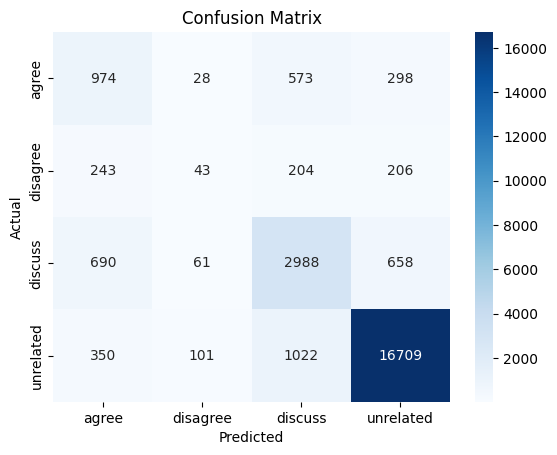

In [ ]:
num_classes = len(le.classes_)
label_names = le.classes_

cm = confusion_matrix(y_test, y_pred, labels=range(num_classes))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# {'agree': (0), 'disagree': (1), 'discuss': (2), 'unrelated': (3)}

In [ ]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6590991 stored elements and shape (49538, 10001)>

In [ ]:
vocab_size = X_head_train.shape[1]  # e.g. 5000
import tensorflow as tf
from tensorflow.keras import layers, models
# Input layers
inp_head = layers.Input(shape=(vocab_size,), name='headline_input')
inp_body = layers.Input(shape=(vocab_size,), name='body_input')
inp_cos = layers.Input(shape=(1,), name='cosine_input')

# Concatenate TF-IDF representations
merged = layers.Concatenate()([inp_head, inp_body, inp_cos])

# Hidden layer
x = layers.Dense(128, activation='relu')(merged)
x = layers.Dropout(0.2)(x)  # prevent overfitting
x = layers.Dense(56, activation='relu')(merged)
x = layers.Dropout(0.1)(x)  # prevent overfitting

# Output layer
out = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=[inp_head, inp_body, inp_cos], outputs=out)

In [ ]:
alpha = tf.constant([0.25, 0.6, 0.1, 0.05])  # You can tune this
model.compile(optimizer='adam',
              loss=focal_loss(gamma=2.0, alpha = alpha),
              metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ headline_input      │ (None, 5000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_input          │ (None, 5000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cosine_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 10001)     │          0 │ headline_input[0… │
│ (Concatenate)       │                   │            │ body_input[0][0], │
│                     │                   │            │ cosine_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  1,280,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │        516 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,280,772 (4.89 MB)

 Trainable params: 1,280,772 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw = dict(enumerate(class_weights))

history = model.fit(
    [X_head_train, X_body_train, X_cos_train],
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    class_weight=cw,
    verbose=2
)

Epoch 1/10
310/310 - 14s - 47ms/step - accuracy: 0.7297 - loss: 0.0610 - val_accuracy: 0.7347 - val_loss: 0.0562
Epoch 2/10
310/310 - 18s - 58ms/step - accuracy: 0.7313 - loss: 0.0609 - val_accuracy: 0.7347 - val_loss: 0.0564
Epoch 3/10
310/310 - 20s - 66ms/step - accuracy: 0.7313 - loss: 0.0608 - val_accuracy: 0.7347 - val_loss: 0.0565
Epoch 4/10


KeyboardInterrupt: 

In [ ]:
y_pred_probs = model.predict([X_head_test, X_body_test, X_cos_test])
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [ ]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2768764 stored elements and shape (25148, 10001)>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape for the merged TF-IDF vector
input_dim = 10001  # or use X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,), name='tfidf_input'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')  # 4 classes: agree, disagree, discuss, unrelated
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or use a custom loss like focal_loss
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,772 (4.92 MB)

 Trainable params: 1,288,772 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train_dense = X_train.toarray()

NameError: name 'X_train' is not defined

In [ ]:
history = model.fit(
    X_train_dense,
    y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

### **Sestence transformer Impliment**

In [ ]:
train_df

,clean_headline,clean_body,label,cosine_sim
0,police find mass graves least 15 bodies near m...,danny boyle directing untitled film seth rogen...,3,0.000000
1,hundreds palestinians flee floods gaza israel ...,hundreds palestinians evacuated homes sunday m...,0,0.575876
2,christian bale passes role steve jobs actor re...,30 year old moscow resident hospitalized wound...,3,0.000000
3,hbo apple talks 15 month apple tv streaming se...,reuters canadian soldier shot canadian war mem...,3,0.000000
4,spider burrowed tourist stomach chest,fear arachnophobes story bunbury spiderman mig...,1,0.205248
...,...,...,...,...
49967,urgent leader isil abu bakr al baghdadi killed...,cnn boko haram laughed nigeria announcement ce...,3,0.020499
49968,brian williams slams social media speculation ...,along unveiling apple watch earlier year compa...,3,0.000000
49969,mexico says missing students found first mass ...,bodies found mass grave confirmed missing stud...,0,0.499086
49970,us lawmaker ten isis fighters apprehended comi...,rep duncan hunter r ca told greta van susteren...,2,0.496540


In [ ]:
y_train

,label
0,3
1,0
2,3
3,3
4,1
...,...
49967,3
49968,3
49969,0
49970,2


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')

# Combine headline + body for input
X_sentences = [f"{head} [SEP] {body}" for head, body in zip(train_df['clean_headline'], train_df['clean_body'])]

# Generate embeddings
X_embeddings = model.encode(X_sentences, show_progress_bar=True)

# Now train a simple classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_embeddings, y_train)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1549 [00:00<?, ?it/s]

RandomForestClassifier()

In [ ]:
#  X_embedding for test data
# Combine headline + body for input
X_sentences = [f"{head} [SEP] {body}" for head, body in zip(test_df['clean_headline'], test_df['clean_body'])]

# Generate embeddings
X_embeddings = model.encode(X_sentences, show_progress_bar=True)

Batches:   0%|          | 0/786 [00:00<?, ?it/s]

In [ ]:
y_pred = clf.predict(X_embeddings)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       agree       0.50      0.00      0.00      1873
    disagree       0.00      0.00      0.00       696
     discuss       0.66      0.01      0.03      4397
   unrelated       0.73      1.00      0.84     18182

    accuracy                           0.72     25148
   macro avg       0.47      0.25      0.22     25148
weighted avg       0.68      0.72      0.61     25148



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Format inputs
train_sentences = [f"Headline: {h} Body: {b}" for h, b in zip(train_df['clean_headline'], train_df['clean_body'])]
test_sentences = [f"Headline: {h} Body: {b}" for h, b in zip(test_df['clean_headline'], test_df['clean_body'])]

# Generate embeddings
X_train_embed = model.encode(train_sentences, show_progress_bar=True)
X_test_embed = model.encode(test_sentences, show_progress_bar=True)

# Train classifier
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train_embed, y_train_enc)




Batches:   0%|          | 0/1549 [00:00<?, ?it/s]

Batches:   0%|          | 0/786 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
# Predict and evaluate
y_pred = clf.predict(X_test_embed)
# Convert le.classes_ to a list of strings before passing to classification_report
target_names_str = [str(cls) for cls in le.classes_]

print(classification_report(y_test_enc, y_pred, target_names=target_names_str))

              precision    recall  f1-score   support

           0       0.12      0.32      0.17      1873
           1       0.11      0.30      0.16       696
           2       0.36      0.40      0.38      4397
           3       0.88      0.64      0.74     18182

    accuracy                           0.56     25148
   macro avg       0.36      0.41      0.36     25148
weighted avg       0.71      0.56      0.62     25148



In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Combine head and body meaningfully
X_sentences = [f"Headline: {h} Body: {b}" for h, b in zip(train_df['clean_headline'], train_df['clean_body'])]
X_embed = model.encode(X_sentences, show_progress_bar=True)


Batches:   0%|          | 0/1549 [00:00<?, ?it/s]

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE works best with float32, and sentence embeddings are continuous vectors
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_embed, train_df['label'])


In [ ]:
clf = LogisticRegression(class_weight =  'balanced')
clf.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
# Embed test set
X_test_sentences = [f"Headline: {h} Body: {b}" for h, b in zip(test_df['clean_headline'], test_df['clean_body'])]
X_test_embed = model.encode(X_test_sentences, show_progress_bar=True)

Batches:   0%|          | 0/786 [00:00<?, ?it/s]

In [ ]:
# Predict and evaluate
y_pred = clf.predict(X_test_embed)
target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names_str))


              precision    recall  f1-score   support

           0       0.11      0.28      0.16      1873
           1       0.09      0.26      0.14       696
           2       0.35      0.40      0.37      4397
           3       0.87      0.65      0.75     18182

    accuracy                           0.57     25148
   macro avg       0.36      0.40      0.35     25148
weighted avg       0.70      0.57      0.62     25148



In [ ]:
# Embed test set
X_test_sentences = [f"Headline: {h} Body: {b}" for h, b in zip(test_df['clean_headline'], test_df['clean_body'])]
X_test_embed = model.encode(X_test_sentences, show_progress_bar=True)

# Predict and evaluate
y_pred = clf.predict(X_test_embed)
target_names_str = [str(cls) for cls in le.classes_]
print(classification_report(y_test, y_pred, target_names=target_names_str))